<a href="https://colab.research.google.com/github/jonimoura/BBB-Analysis-Big-Brother-Brasil-/blob/master/AnalysisBBB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análise de texto de tweets coletados no dia 10/04/2020

In [141]:
#Import packages and libraries
import re
import string
import numpy as np
import random
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px
from collections import Counter
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

import warnings
warnings.filterwarnings("ignore")


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [0]:
#generating random colors to the plots
def random_colors(number_of_colors):
  colors = []
  for i in range(number_of_colors):
    colors.append("#"+''.join([random.choice('0123456789CDEF') for j in range(6)]))
  return colors


In [0]:
#import data
tweets = pd.read_csv('/content/tweets_data.csv', encoding ='utf-8')  

In [178]:
tweets.head()

,user_id,status_id,created_at,screen_name,text,source,display_text_width,reply_to_status_id,reply_to_user_id,reply_to_screen_name,is_quote,is_retweet,favorite_count,retweet_count,quote_count,reply_count,hashtags,symbols,urls_url,urls_t.co,urls_expanded_url,media_url,media_t.co,media_expanded_url,media_type,ext_media_url,ext_media_t.co,ext_media_expanded_url,ext_media_type,mentions_user_id,mentions_screen_name,lang,quoted_status_id,quoted_text,quoted_created_at,quoted_source,quoted_favorite_count,quoted_retweet_count,quoted_user_id,quoted_screen_name,...,retweet_favorite_count,retweet_retweet_count,retweet_user_id,retweet_screen_name,retweet_name,retweet_followers_count,retweet_friends_count,retweet_statuses_count,retweet_location,retweet_description,retweet_verified,place_url,place_name,place_full_name,place_type,country,country_code,geo_coords,coords_coords,bbox_coords,status_url,name,location,description,url,protected,followers_count,friends_count,listed_count,statuses_count,favourites_count,account_created_at,verified,profile_url,profile_expanded_url,account_lang,profile_banner_url,profile_background_url,profile_image_url,temp_list
0,x1211484016886439936,x1248603908785803264,2020-04-10 13:29:04,okelvinpaes,babu continua sim no m podium favoritismo mas...,Twitter for Android,217,NaN,NaN,NaN,False,False,0,0,NaN,NaN,BBB20 redebbb bbb,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,pt,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://api.twitter.com/1.1/geo/id/68e019afec7...,Sao Paulo,"Sao Paulo, Brazil",city,Brazil,BR,NA NA,NA NA,-46.826039 -46.365052 -46.365052 -46.826039 -2...,https://twitter.com/okelvinpaes/status/1248603...,Oportunitta Bugmaer <U+2728>,"São Paulo, Brasil",apenas eu (também pode ser a música da Luísa S...,NaN,False,37,50,0,533,1494,2019-12-30 03:08:08,False,NaN,NaN,NaN,https://pbs.twimg.com/profile_banners/12114840...,NaN,http://pbs.twimg.com/profile_images/1211503584...,"[babu, continua, sim, m, podium, favoritismo, ..."
1,x1211484016886439936,x1248599799626182669,2020-04-10 13:12:44,okelvinpaes,on povo tira qu tem barro no pq at gramado s...,Twitter for Android,172,NaN,NaN,NaN,False,False,0,0,NaN,NaN,bbb bbb20 redebbb thelmacampeã,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,pt,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NA NA,NA NA,NA NA NA NA NA NA NA NA,https://twitter.com/okelvinpaes/status/1248599...,Oportunitta Bugmaer <U+2728>,"São Paulo, Brasil",apenas eu (também pode ser a música da Luísa S...,NaN,False,37,50,0,533,1494,2019-12-30 03:08:08,False,NaN,NaN,NaN,https://pbs.twimg.com/profile_banners/12114840...,NaN,http://pbs.twimg.com/profile_images/1211503584...,"[on, povo, tira, qu, barro, pq, at, gramado, s..."
2,x1211484016886439936,x1248601913135730696,2020-04-10 13:21:08,okelvinpaes,casa do qua to falsa um veriro cenário do pro...,Twitter for Android,232,NaN,NaN,NaN,False,False,1,0,NaN,NaN,bbb redebbb bbb20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,pt,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://api.twitter.com/1.1/geo/id/68e019afec7...,Sao Paulo,"Sao Paulo, Brazil",city,Brazil,BR,NA NA,NA NA,-46.826039 -46.365052 -46.365052 -46.826039 -2...,https://twitter.com/okelvinpaes/status/1248601...,Oportunitta Bugmaer <U+2728>,"São Paulo, Brasil",apenas eu (também pode ser a música da Luísa S...,NaN,False,37,50,0,533,1494,2019-12-30 03:08:08,False,NaN,NaN,NaN,https://pbs.twimg.com/profile_banners/12114840...,NaN,http://pbs.twimg.com/profile_images/1211503584...,"[casa, qua, to, falsa, veriro, cenário, projac..."
3,x1211484016886439936,x1248299579826745345,2020-04-09 17:19:46,okelvinpaes,adoro quando as pessoas estão alcoolizas pois ...,Twitter for Android,155,NaN,NaN,NaN,False,False,7,0,NaN,NaN,redebbb bbb20 bbb ForaFlay ForaFlayslane,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,pt,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN

In [0]:
#Cleaning data
def clean_text(text):
  '''put text in lowercase, remove texte in 
  square brackets, remove link, punctuation 
  and words containing numbers'''
  text = str(text).lower()
  text = re.sub('\[.*?\]', '', text)
  text = re.sub('https?://\S+|www\.\S+', '', text)
  text = re.sub('<.*?>+', '', text)
  text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
  text = re.sub('\n', '', text)
  text = re.sub(r'(?:^| )\w(?:$| )', ' ', text).strip()
  text = re.sub('\w*\d\w*', '', text)
  text = re.sub('bbb', '', text)
  text = re.sub('rede', '', text)
  text = re.sub('você', '', text)
  texte = re.sub('se', '', text)
  text = re.sub('de', '', text)
  text = re.sub('eu', '', text)
  text = re.sub('da', '', text)
  text = re.sub('não', '', text)
  text = re.sub('é', '', text)
  text = re.sub('na', '', text)
  text = re.sub('pra', '', text)
  text = re.sub('com', '', text)
  text = re.sub('se', '', text)
  text = re.sub('ela', '', text)
  text = re.sub('ele', '', text)
  text = re.sub(' s ', '', text)

  return text



In [0]:
tweets['text'] = tweets['text'].apply(lambda x:clean_text(x))
tweets['temp_list'] = tweets['text'].apply(lambda x:str(x).split())

In [0]:
#Remove Stopwords
def remove_stopword(x):
    return [y for y in x if y not in stopwords.words('portuguese')]
tweets['temp_list'] = tweets['temp_list'].apply(lambda x:remove_stopword(x))

In [160]:

#Visualize the 10 most common words
top = Counter([item for sublist in tweets['temp_list'] for item in sublist])
temp = pd.DataFrame(top.most_common(10))
temp = temp.iloc[1:,:]
temp.columns = ['Palavras_frequentes', 'Frequência']
temp.style.background_gradient(cmap='Purples')


,Palavras_frequentes,Frequência
1,babu,1166
2,flay,1087
3,rafa,1054
4,manu,993
5,bigbrotherbrasil,849
6,ivy,827
7,globo,820
8,provadolir,783
9,via,737


In [0]:
def plot_wordcloud(text, mask=None, max_words=1000, max_font_size=60, 
                   min_font_size=1,relative_scaling=1, figure_size=(24.0,16.0), color = 'white',
                   title = None, title_size=40, image_color=False):
    stopwords = set(STOPWORDS)
    more_stopwords = {'bigbrotherbrasil', "vai", "vai", "lír", "tv", "quizurpt"}
    stopwords = stopwords.union(more_stopwords)

    wordcloud = WordCloud(background_color=color,
                    stopwords = stopwords,
                    max_words = max_words, 
                    max_font_size = max_font_size,
                    min_font_size = min_font_size,
                    relative_scaling=relative_scaling,
                    random_state = None,
                    width=400, 
                    height=200,
                    mask = mask)
    wordcloud.generate(str(text))
    
    plt.figure(figsize=figure_size)
    if image_color:
        image_colors = ImageColorGenerator(mask);
        plt.imshow(wordcloud.recolor(color_func=image_colors), interpolation="bilinear");
        plt.title(title, fontdict={'size': title_size,  
                                  'verticalalignment': 'bottom'})
    else:
        plt.imshow(wordcloud);
        plt.title(title, fontdict={'size': title_size, 'color': 'black', 
                                  'verticalalignment': 'bottom'})
    plt.axis('off');
    plt.tight_layout()  
d = '/content/'

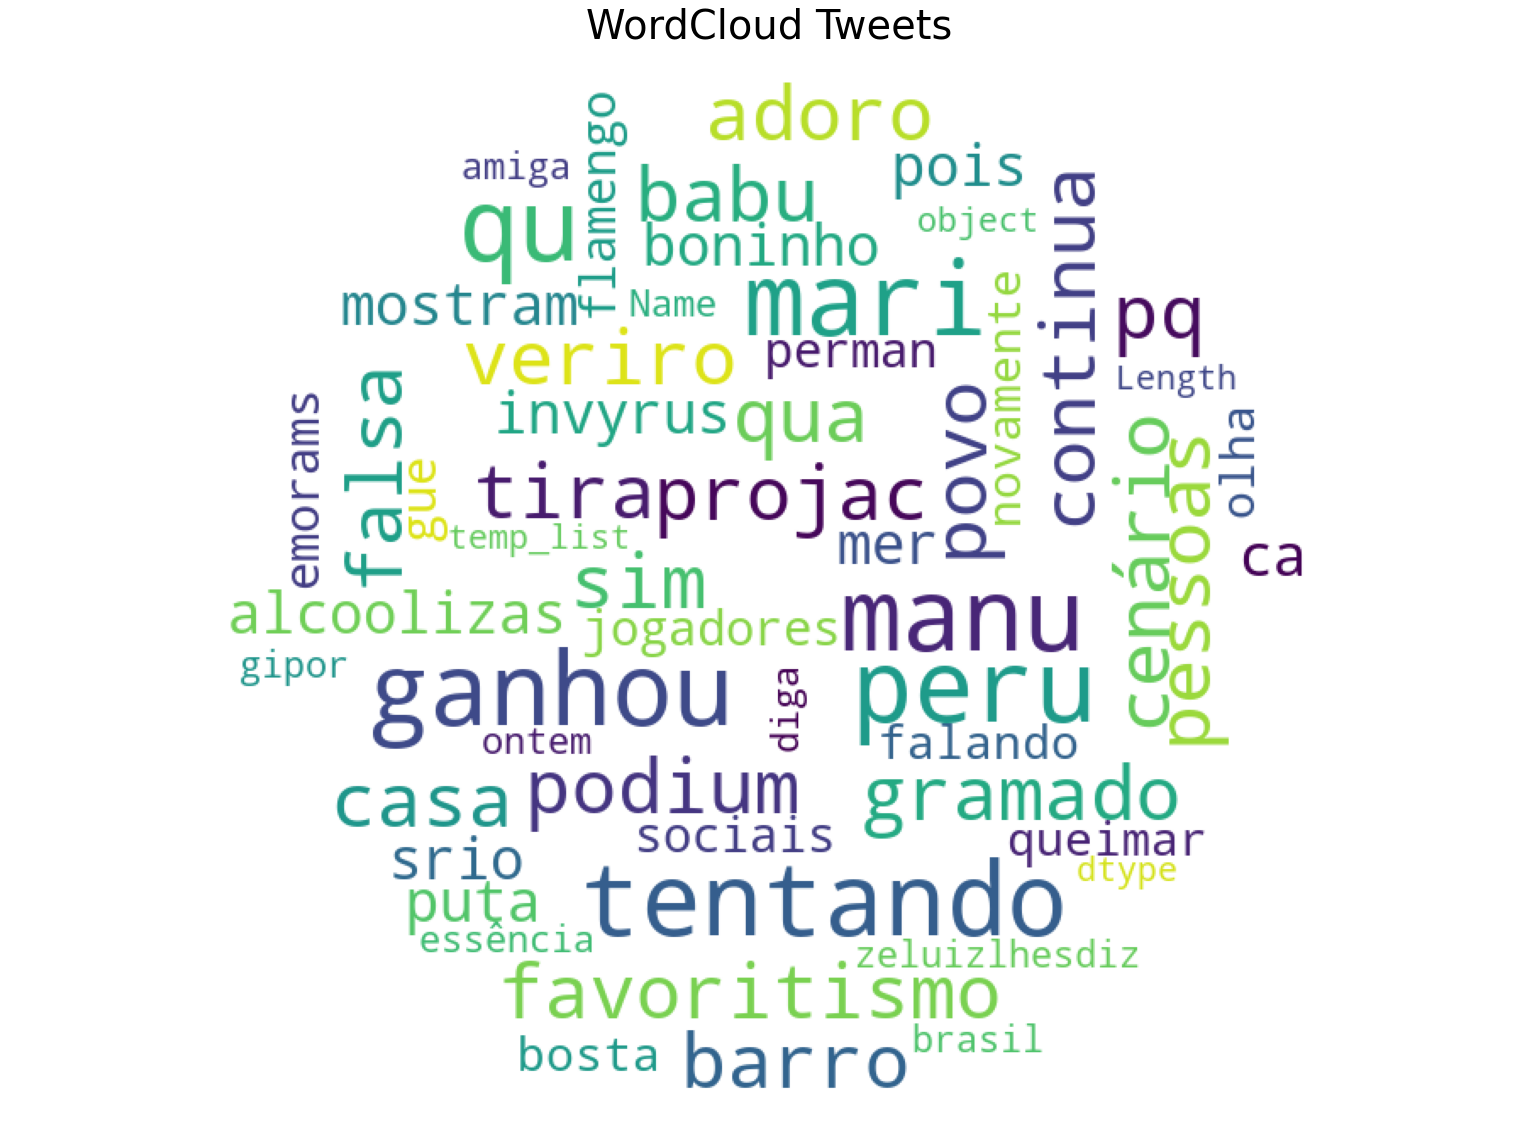

In [169]:
pos_mask = np.array(Image.open(d +'circle.jpeg'))
plot_wordcloud(tweets['temp_list'],  mask=pos_mask, max_words= 1000,
               color='white',title="WordCloud Tweets",
               relative_scaling= 0.5)


Text(0.5, 1.0, 'Palavras mais comentadas #BBB')

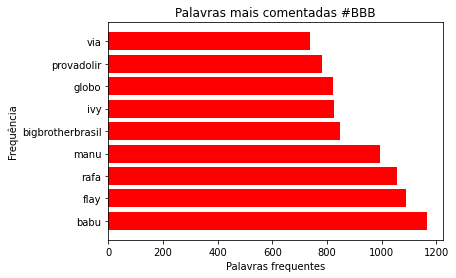

In [177]:
plt.barh(temp['Palavras_frequentes'], temp['Frequência'], color= "red")
plt.ylabel('Frequência')
plt.xlabel('Palavras frequentes')
plt.title('Palavras mais comentadas #BBB')